In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


# 1.1. Carga y Preparación de Datos
Cargaremos el excel que contiene todos los datos de los formularios de las Iniciativas en Fase 1
Los datos que vamos a considerar para el estudio son los de Puntaje/Notas, debido a que estos son datos de tipo cuantitativo. Ademas se agrego la columna Estado ya que es una variable importante y es de tipo categorica.

In [2]:
# 1. Cargar el archivo (ajustando para que la fila 3 sea el encabezado)
# Nota: skiprows=2 indica que saltamos las primeras 2 filas, dejando la 3 como header.
archivo = 'db\Iniciativas_VcM_2025_03_12_2025_12_47.xlsx'

df = pd.read_excel(archivo, skiprows=2)

# Verificamos las primeras filas
df.head()

<>:3: SyntaxWarning: "\I" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\I"? A raw string is also an option.
<>:3: SyntaxWarning: "\I" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\I"? A raw string is also an option.
C:\Users\pablo\AppData\Local\Temp\ipykernel_18388\4107526004.py:3: SyntaxWarning: "\I" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\I"? A raw string is also an option.
  archivo = 'db\Iniciativas_VcM_2025_03_12_2025_12_47.xlsx'


,ID,Nombre,Primer apellido,Segundo apellido,Email,Estado,% Avance,Fecha de creación,Fecha envío,Nombre Postulación,...,Potencial de Multidisciplina o Interdisciplina,Antigüedad de la Actividad,Diagnóstico de Necesidad o Interés,Relación con Actores Externos,Alcance de la Contribución,Generación de Conocimiento y Retroalimentación,Factibilidad Técnico-Presupuestaria,Validación Unidad de Origen (0.0%),Validación Vinculación con el Medio (100.0%),Nota final
0,884034,VANESSA,NOWAK,NOWAK,vanessa.regina.nowak@gmail.com,En creación,0.00,27/02/2025 11:47,NaN,1,...,1,1,1,1,1,1,1,0,0.000000,0.000000
1,884263,PAULINA,RÍOS,SANTANA,paulina.rios@umayor.cl,En creación,18.41,28/02/2025 09:20,NaN,1,...,1,1,1,1,1,1,1,0,0.000000,0.000000
2,884268,VERÓNICA,GÁRATE,NAVARRETE,veronica.garate@umayor.cl,Enviada,100.00,28/02/2025 09:55,28/02/2025 11:40,1,...,2,4,4,4,4,3,3,100,76.666667,76.666667
3,884341,CLAUDIO SEBASTIÁN,NAVARRETE,MICHELINI,claudio.navarrete@umayor.cl,Enviada,100.00,28/02/2025 15:22,12/03/2025 11:49,1,...,1,4,4,2,3,3,3,100,56.666667,56.666667
4,884366,KRISTHAL,ARDURA,TIBAMOSO,kristhal.ardura@umayor.cl,Enviada,100.00,28/02/2025 16:50,26/03/2025 13:47,1,...,2,3,4,4,4,4,4,100,83.333333,83.333333


In [3]:
# 2. Definir columnas (Separamos la categórica de las numéricas)
col_categorica = ['Estado']
cols_numericas = [
    'Alineación Estratégica con la Unidad de Origen',
    'Potencial de Multidisciplina o Interdisciplina',
    'Antigüedad de la Actividad',
    'Diagnóstico de Necesidad o Interés',
    'Relación con Actores Externos',
    'Alcance de la Contribución',
    'Generación de Conocimiento y Retroalimentación',
    'Factibilidad Técnico-Presupuestaria',
    'Validación Unidad de Origen (0.0%)'
]
columna_y = 'Nota final'

# 3. Tratamiento especial para la columna categórica
# Creamos variables dummy: Esto creará una columna llamada 'Estado_Enviada' 
# donde 1 es Enviada y 0 es En creación.
df_dummies = pd.get_dummies(df[col_categorica], drop_first=True)

# 4. Limpieza de las columnas numéricas
df_num_clean = df[cols_numericas + [columna_y]].apply(pd.to_numeric, errors='coerce')

# 5. Unir todo y eliminar filas con Nulos
df_final = pd.concat([df_dummies, df_num_clean], axis=1).dropna()

df_final.head()

,Estado_Enviada,Alineación Estratégica con la Unidad de Origen,Potencial de Multidisciplina o Interdisciplina,Antigüedad de la Actividad,Diagnóstico de Necesidad o Interés,Relación con Actores Externos,Alcance de la Contribución,Generación de Conocimiento y Retroalimentación,Factibilidad Técnico-Presupuestaria,Validación Unidad de Origen (0.0%),Nota final
0,False,0,1,1,1,1,1,1,1,0,0.000000
1,False,0,1,1,1,1,1,1,1,0,0.000000
2,True,1,2,4,4,4,4,3,3,100,76.666667
3,True,1,1,4,4,2,3,3,3,100,56.666667
4,True,1,2,3,4,4,4,4,4,100,83.333333


In [4]:
# Ahora tus X incluyen la variable de Estado transformada
X = df_final.drop(columns=[columna_y])
y = df_final[columna_y]

# 2 Regresión Lineal

In [5]:
# 2. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Escalado
scaler = MinMaxScaler()

# Ajustamos solo con entrenamiento y transformamos ambos
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# 4. Modelo
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

# 5. Predicciones y Métricas
y_pred = reg.predict(X_test_scaled)

mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Métricas del Modelo:\nMAE: {mae_test:.4f}\nRMSE: {rmse_test:.4f}\nR2: {r2:.4f}")

Métricas del Modelo:
MAE: 0.3381
RMSE: 0.5470
R2: 0.9997


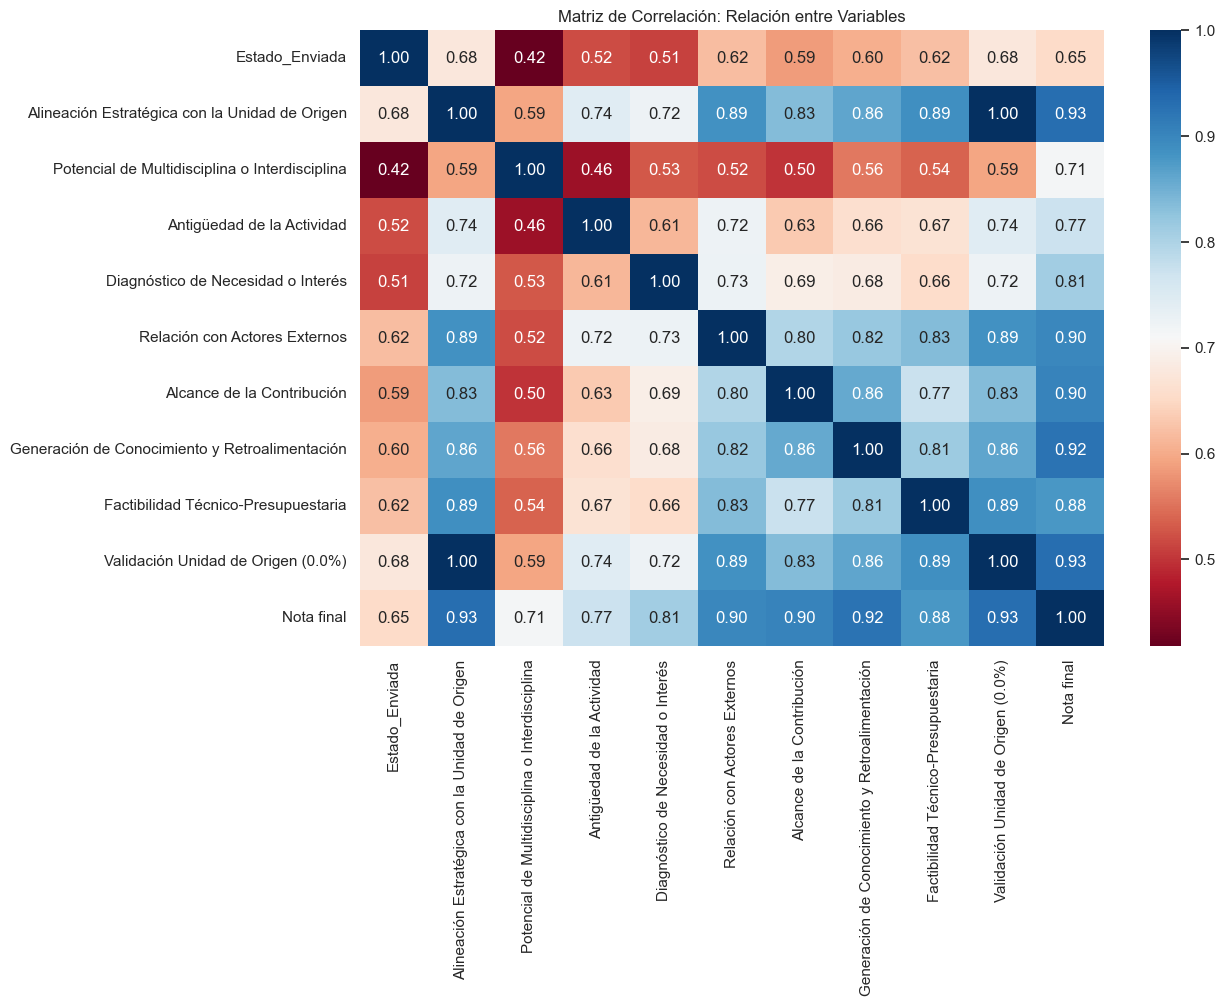

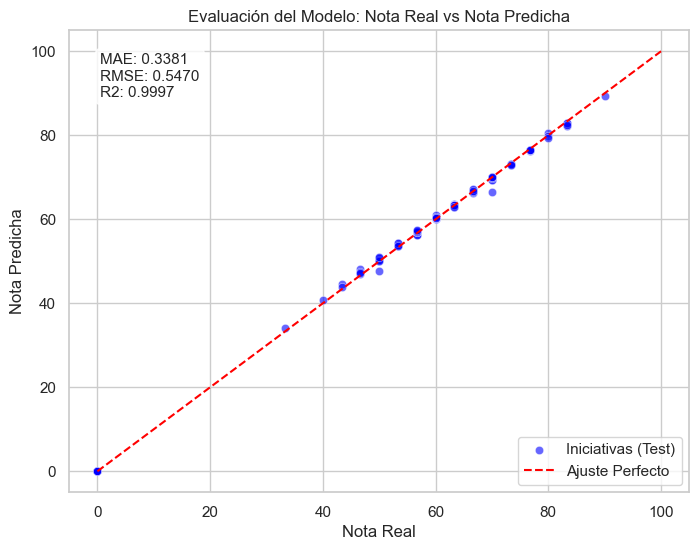

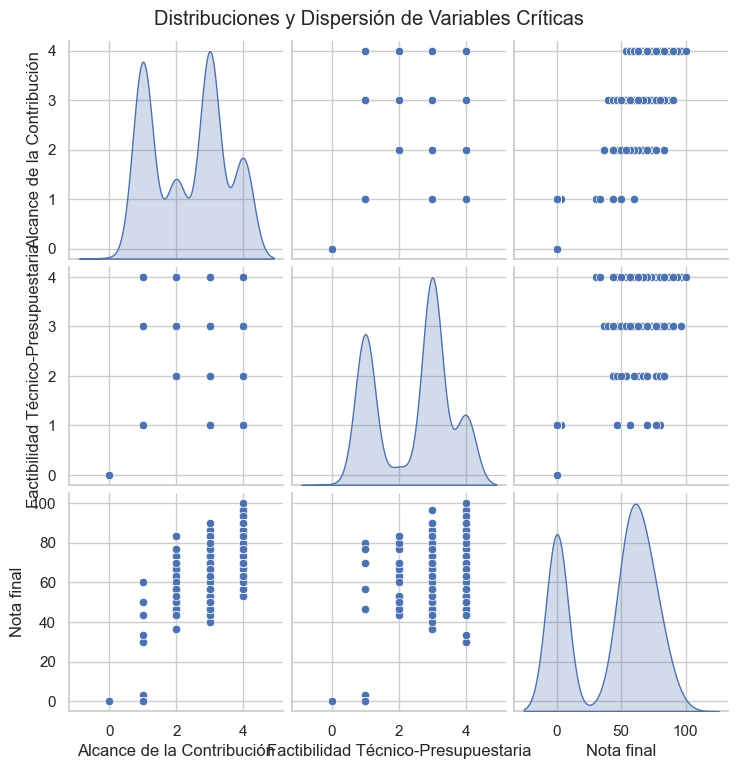

In [6]:
sns.set_theme(style="whitegrid")

# --- GRÁFICO 1: Matriz de Correlación ---
plt.figure(figsize=(12, 8))
sns.heatmap(df_final.corr(), annot=True, cmap='RdBu', fmt=".2f")
plt.title('Matriz de Correlación: Relación entre Variables')
plt.show()

# --- GRÁFICO 2: Evaluación (Real vs Predicho) con Métricas ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue', label='Iniciativas (Test)')

# Línea de ajuste perfecto
linea_ideal = [y.min(), y.max()]
plt.plot(linea_ideal, linea_ideal, color='red', linestyle='--', label='Ajuste Perfecto')

# Recuadro de texto con métricas reales calculadas
texto_metricas = f'MAE: {mae_test:.4f}\nRMSE: {rmse_test:.4f}\nR2: {r2:.4f}'
plt.gca().text(0.05, 0.95, texto_metricas, transform=plt.gca().transAxes, 
               fontsize=11, verticalalignment='top', 
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title('Evaluación del Modelo: Nota Real vs Nota Predicha')
plt.xlabel('Nota Real')
plt.ylabel('Nota Predicha')
plt.legend(loc='lower right')
plt.show()

# --- GRÁFICO 3: Pairplot de Variables Clave ---
cols_interes = ['Alcance de la Contribución', 'Factibilidad Técnico-Presupuestaria', 'Nota final']
sns.pairplot(df_final[cols_interes], diag_kind='kde', height=2.5)
plt.suptitle('Distribuciones y Dispersión de Variables Críticas', y=1.02)
plt.show()

--- IMPACTO DE CADA VARIABLE EN LA NOTA FINAL ---
                                         Variable  Coeficiente
2  Potencial de Multidisciplina o Interdisciplina    26.045462
6                      Alcance de la Contribución    25.781605
7  Generación de Conocimiento y Retroalimentación    25.680663
4              Diagnóstico de Necesidad o Interés    13.089053
3                      Antigüedad de la Actividad    12.526860
5                   Relación con Actores Externos    12.100426
8             Factibilidad Técnico-Presupuestaria    11.213643
1  Alineación Estratégica con la Unidad de Origen     1.741498
9              Validación Unidad de Origen (0.0%)     1.741498
0                                  Estado_Enviada     0.150639


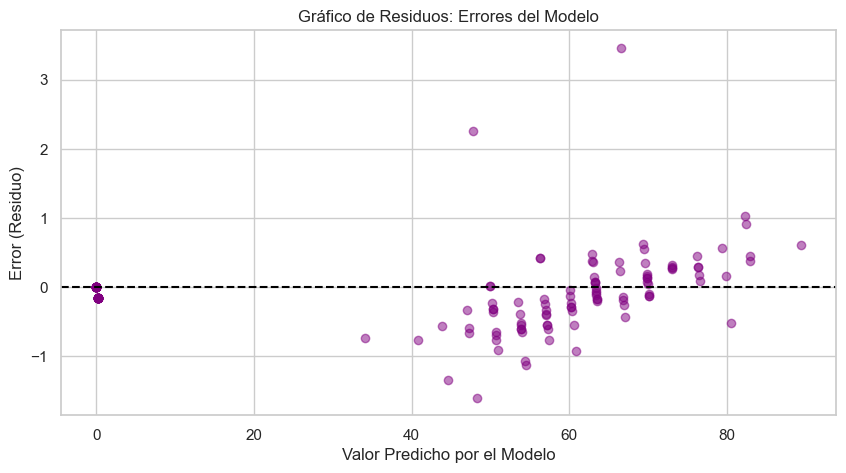

In [7]:
# Creamos un DataFrame para ver los pesos ordenados
importancia = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': reg.coef_
}).sort_values(by='Coeficiente', ascending=False)

print("--- IMPACTO DE CADA VARIABLE EN LA NOTA FINAL ---")
print(importancia)

# --- GRÁFICO DE RESIDUOS ---
# El residuo es: Valor Real - Valor Predicho
residuos = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuos, color='purple', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Gráfico de Residuos: Errores del Modelo')
plt.xlabel('Valor Predicho por el Modelo')
plt.ylabel('Error (Residuo)')
plt.show()

C:\Users\pablo\AppData\Local\Temp\ipykernel_18388\1693962306.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia, x='Coeficiente', y='Variable', palette=colors)


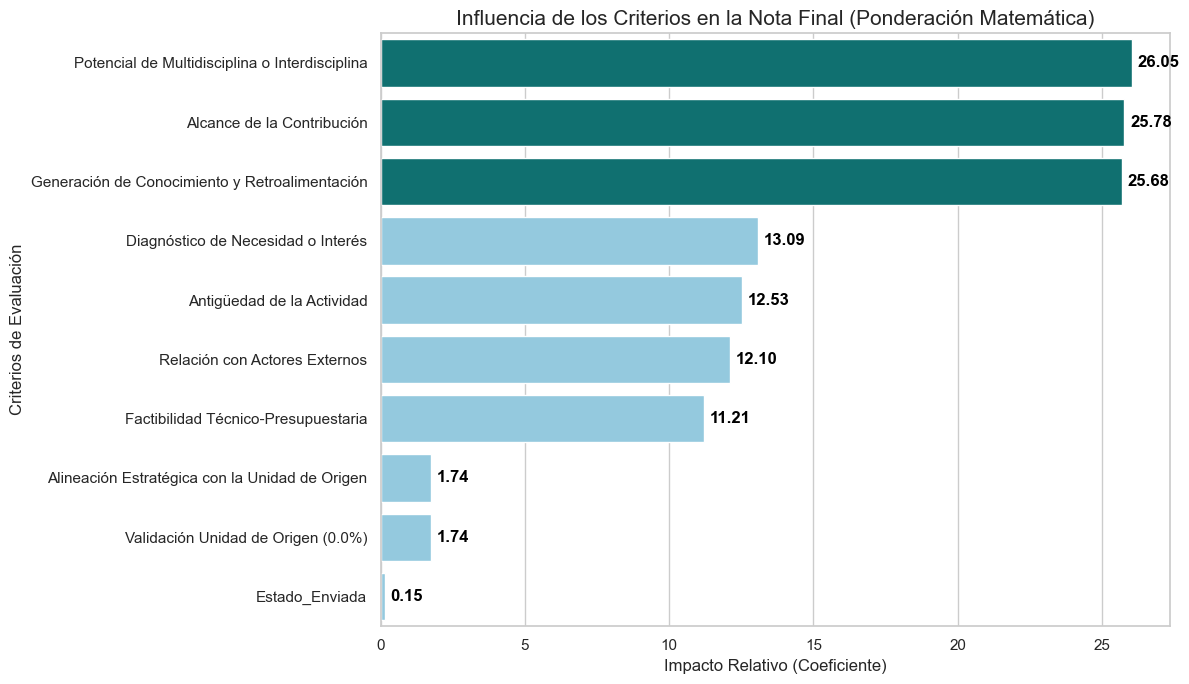

In [8]:
# Configurar el estilo
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Crear el gráfico de barras
colors = ['teal' if (x > 20) else 'skyblue' for x in importancia['Coeficiente']]
sns.barplot(data=importancia, x='Coeficiente', y='Variable', palette=colors)

plt.title('Influencia de los Criterios en la Nota Final (Ponderación Matemática)', fontsize=15)
plt.xlabel('Impacto Relativo (Coeficiente)', fontsize=12)
plt.ylabel('Criterios de Evaluación', fontsize=12)

# Añadir los valores al final de las barras
for i, v in enumerate(importancia['Coeficiente']):
    plt.text(v + 0.2, i, f'{v:.2f}', color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# 3 Regresión Logistica

C:\Users\pablo\AppData\Local\Temp\ipykernel_18388\3368941054.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x=df_final['Estado_Enviada'], y=df_final['Alcance de la Contribución'], palette="Set2")
C:\Users\pablo\AppData\Local\Temp\ipykernel_18388\3368941054.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[2], x=y_binaria, palette="magma")


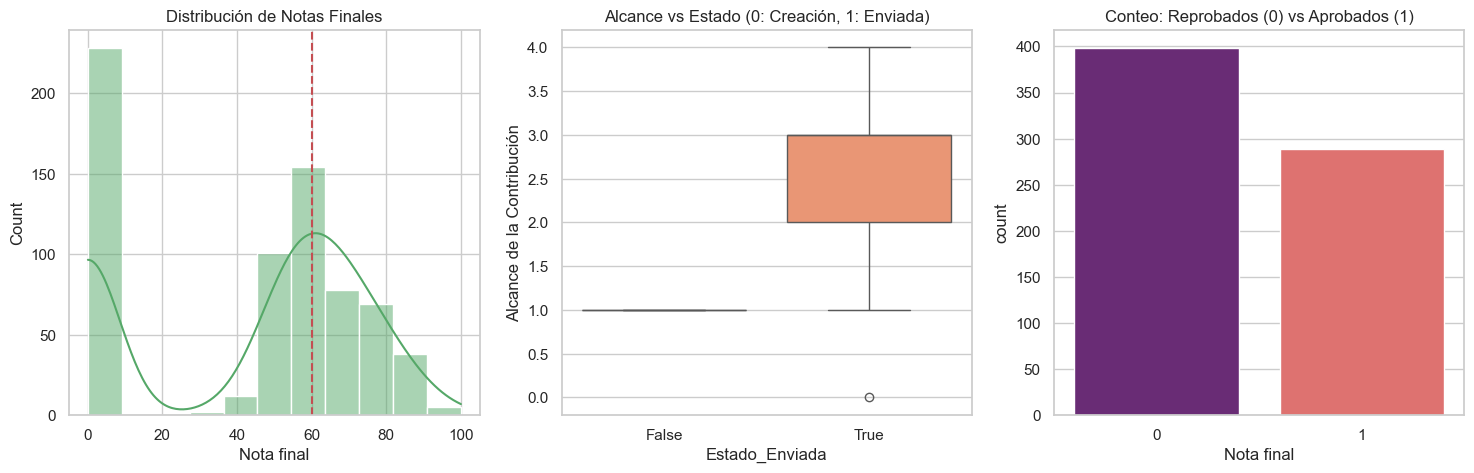

In [9]:
# Definimos el umbral de aprobación (60%)
umbral = 60.0
y_binaria = (y >= umbral).astype(int)

# --- VISUALIZACIONES INICIALES (EDA) ---
# Distribución de algunas variables clave y el balance de la variable objetivo
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribución de la Nota Final
sns.histplot(ax=axes[0], x=y, kde=True, color="g")
axes[0].set_title('Distribución de Notas Finales')
axes[0].axvline(umbral, color='r', linestyle='--', label='Umbral (60)')

# Boxplot de Alcance por Estado
sns.boxplot(ax=axes[1], x=df_final['Estado_Enviada'], y=df_final['Alcance de la Contribución'], palette="Set2")
axes[1].set_title('Alcance vs Estado (0: Creación, 1: Enviada)')

# Conteo de Aprobados vs Reprobados
sns.countplot(ax=axes[2], x=y_binaria, palette="magma")
axes[2].set_title('Conteo: Reprobados (0) vs Aprobados (1)')
plt.show()

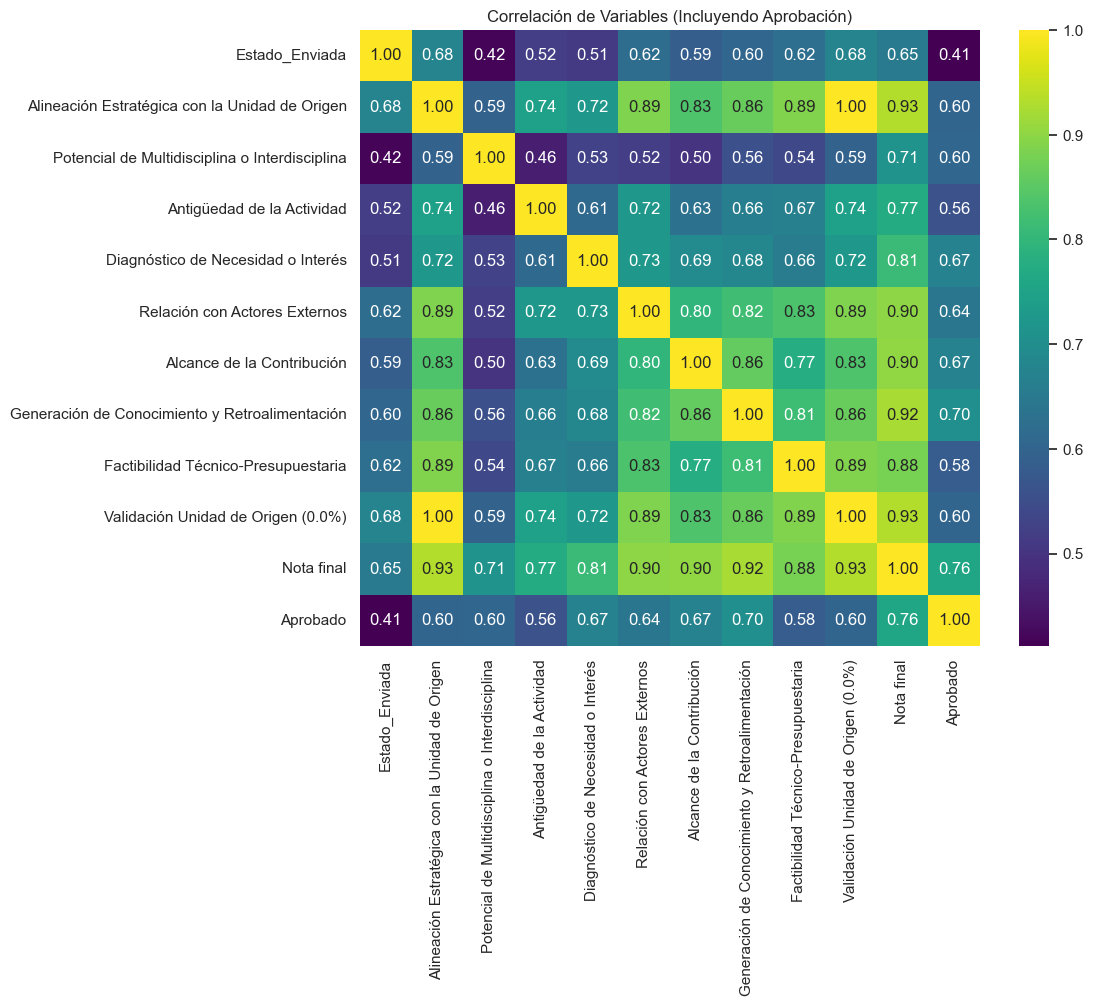

In [10]:
# --- MATRIZ DE CORRELACIÓN ---
plt.figure(figsize=(10, 8))
# Incluimos la variable binaria en la correlación para ver qué influye en "aprobar"
df_corr = df_final.copy()
df_corr['Aprobado'] = y_binaria
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlación de Variables (Incluyendo Aprobación)')
plt.show()

In [11]:
# Split de datos
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_binaria, test_size=0.2, random_state=42)

# Escalado (MinMaxScaler)
scaler_log = MinMaxScaler()
X_train_log = scaler_log.fit_transform(X_train_log)
X_test_log = scaler_log.transform(X_test_log)

# Creación y ajuste del modelo
# C=0.1 y max_iter=1000 para asegurar convergencia
log_model = LogisticRegression(C=1.0, max_iter=1000) 
log_model.fit(X_train_log, y_train_log)

# Predicciones
y_pred_log = log_model.predict(X_test_log)

In [12]:
print("--- MÉTRICAS DE DESEMPEÑO ---")
print(f'Accuracy Test: {accuracy_score(y_test_log, y_pred_log):.4f}')
print(f'Precision: {precision_score(y_test_log, y_pred_log, zero_division=0):.4f}')
print(f'Recall: {recall_score(y_test_log, y_pred_log, zero_division=0):.4f}')
print(f'F1 Score: {f1_score(y_test_log, y_pred_log, zero_division=0):.4f}')

print("\n--- REPORTE DE CLASIFICACIÓN ---")
print(classification_report(y_test_log, y_pred_log))

--- MÉTRICAS DE DESEMPEÑO ---
Accuracy Test: 0.9565
Precision: 0.9180
Recall: 0.9825
F1 Score: 0.9492

--- REPORTE DE CLASIFICACIÓN ---
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        81
           1       0.92      0.98      0.95        57

    accuracy                           0.96       138
   macro avg       0.95      0.96      0.96       138
weighted avg       0.96      0.96      0.96       138



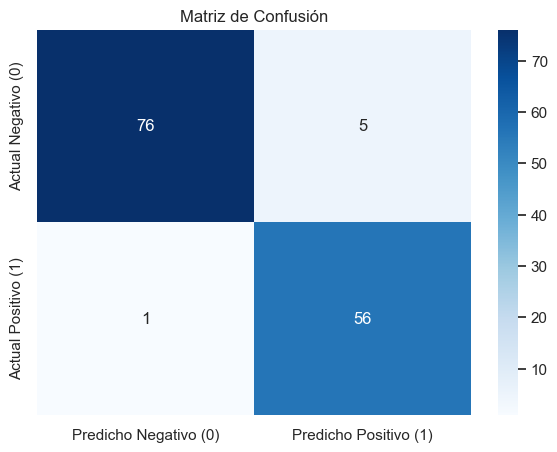

In [13]:
# --- MATRIZ DE CONFUSIÓN ---
conf_matrix = confusion_matrix(y_test_log, y_pred_log)
df_cm = pd.DataFrame(conf_matrix, 
                     columns=['Predicho Negativo (0)', 'Predicho Positivo (1)'], 
                     index=['Actual Negativo (0)', 'Actual Positivo (1)'])

plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

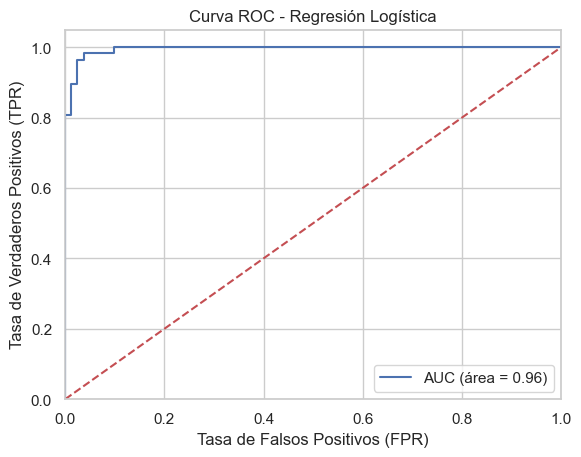

In [14]:
# Solo graficamos si hay ambas clases en el set de test
if len(np.unique(y_test_log)) > 1:
    model_roc_auc = roc_auc_score(y_test_log, log_model.predict(X_test_log))
    fpr, tpr, thresholds = roc_curve(y_test_log, log_model.predict_proba(X_test_log)[:,1])

    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC (área = {model_roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva ROC - Regresión Logística')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("\nNo se puede generar curva ROC: El set de prueba solo contiene una clase.")